In [13]:
%matplotlib inline

import pandas as pd, numpy as np
import matplotlib.pyplot as plt

from qiime.parse import parse_mapping_file
from qiime.format import format_mapping_file
from skbio.io.util import open_file
from scipy.stats import pearsonr, spearmanr

def load_mf(fn):
    with open_file(fn, 'U') as f:
        mapping_data, header, _ = parse_mapping_file(f)
        _mapping_file = pd.DataFrame(mapping_data, columns=header)
        _mapping_file.set_index('SampleID', inplace=True)
    return _mapping_file

def write_mf(f, _df):
    with open_file(f, 'w') as fp:
        lines = format_mapping_file(['SampleID'] + _df.columns.tolist(),
                                    list(_df.itertuples()))
        fp.write(lines+'\n')

The nearest sequenced taxon index can be calculated as part of the `predict_metagenomes.py` script.

In [2]:
nsti = pd.read_csv('NSTI_dogs_IBD.txt', sep='\t', index_col='#Sample')

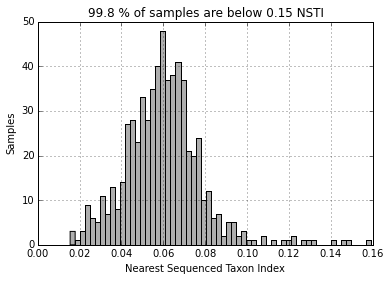

In [18]:
nsti.Value.hist(bins=60, color='#aeaeae')
plt.xlabel('Nearest Sequenced Taxon Index')
plt.ylabel('Samples')
plt.title('99.8 % of samples are below 0.15 NSTI')

plt.savefig('nsti.pdf')

In [9]:
(nsti.Value < 0.06).value_counts()

True     329
False    299
Name: Value, dtype: int64

In [11]:
(nsti.Value < 0.15).value_counts()

True     627
False      1
Name: Value, dtype: int64